<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/dim-reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dimension reduction 
three Dimensionality reduction techniques specifically used for Data Visualization: PCA, t-SNE, LDA and UMAP. We are going to explore them in details using the Sign Language MNIST Dataset, without going in-depth with the maths behind the algorithms.

In [1]:
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

Main Approaches for Dimensionality Reduction

The two main approaches to reducing dimensionality: Projection and Manifold Learning.

* Projection: This technique deals with projecting every data point which is in high dimension, onto a subspace suitable lower-dimensional space in a way which approximately preserves the distances between the points.
* Manifold Learning: Many dimensionality reductions algorithm work by modelling the manifold on which the training instance lie; this is called Manifold learning. It relies on the manifold hypothesis or assumption, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold, this assumption in most of the cases is based on observation or experience rather than theory or pure logic.

## Dataset
Now we are going to go through the above-mentioned use case where all the three techniques will be applied: specifically, we will try to visualize a high dimensional dataset using these techniques: The Sign-Language-MNIST Dataset:https://www.kaggle.com/datamunge/sign-language-mnist

https://www.kaggle.com/datamunge/sign-language-mnist

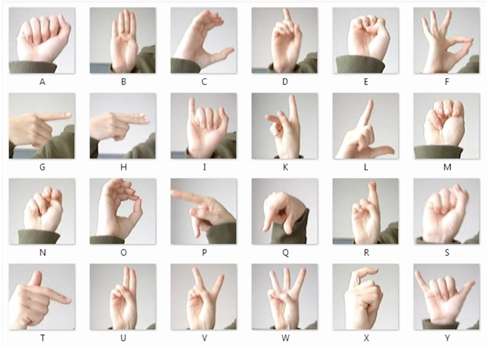

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir data
!cp drive/Shareddrives/Teaching/data/Sign\ MNIST.zip  ./data/

In [9]:
!unzip data/Sign\ MNIST.zip -d data/

Archive:  data/Sign MNIST.zip
  inflating: data/amer_sign2.png     
  inflating: data/amer_sign3.png     
  inflating: data/american_sign_language.PNG  
  inflating: data/sign_mnist_test.csv  
  inflating: data/sign_mnist_test/sign_mnist_test.csv  
  inflating: data/sign_mnist_train.csv  
  inflating: data/sign_mnist_train/sign_mnist_train.csv  


In [11]:
train = pd.read_csv('/content/data/sign_mnist_test/sign_mnist_test.csv')
train.head()

#picking only the first 10 labels
train = train[train['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values
#view raw

In [26]:
def plot_2d(component1, component2):    
  fig = go.Figure(data=go.Scatter(
      x = component1,
      y = component2,
      mode='markers',
      marker=dict(
          size=5,
          color=y, #set color equal to a variable
          colorscale='Rainbow', # one of plotly colorscales
          showscale=True,
          line_width=1
      )
  ))
  fig.update_layout(margin=dict( l=50,r=50,b=50,t=50),width=500,height=500)                 
  fig.layout.template = 'plotly_dark'
  fig.show()


def plot_3d(component1,component2,component3):
  fig = go.Figure(data=[go.Scatter3d(
    x=component1,
    y=component2,
    z=component3,
    mode='markers',
    marker=dict(
        size=5,
        color=y,                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=1,
        line_width=1
    )
  )])
  # tight layout
  fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=500,height=500)
  fig.layout.template = 'plotly_dark'

  fig.show()

## Standardizing the data

In [13]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

In [14]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 0.24399900436401367 seconds


In [27]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [28]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

## TSNE
t-SNE ( T-distributed stochastic neighbour embedding ) 
(t-SNE) or T-distributed stochastic neighbour embedding created in 2008 by (Laurens van der Maaten and Geoffrey Hinton) for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

(t-SNE) takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart

One thing to note down is that t-SNE is very computationally expensive, hence it is mentioned in its documentation that :

“It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.”[2]

In [59]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 41.71908903121948 seconds


In [60]:
plot_2d(tsne[:, 0],tsne[:, 1])

In [61]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

## UMAP

UMAP ( Uniform Manifold Approximation and Projection )

Uniform Manifold Approximation and Projection created in 2018 by (Leland McInnes, John Healy, James Melville) is a general-purpose manifold learning and dimension reduction algorithm.

* UMAP is a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.

The significant difference with TSNE is scalability, it can be applied directly to sparse matrices thereby eliminating the need to applying any Dimensionality reduction such as PCA or Truncated SVD(Singular VaUMAP ( Uniform Manifold Approximation and Projection )

Uniform Manifold Approximation and Projection created in 2018 by (Leland McInnes, John Healy, James Melville) is a general-purpose manifold learning and dimension reduction algorithm.

* UMAP is a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.

The significant difference with TSNE is scalability, it can be applied directly to sparse matrices thereby eliminating the need to applying any Dimensionality reduction such as PCA or Truncated SVD(Singular Value Decomposition) as a prior pre-processing step.[1]


Implementing UMAP

UMAP has different hyperparameters that can have an impact on the resulting embeddings:

* n_neighbors

This parameter controls how UMAP balances local versus global structure in the data. This low values of n_neighbours forces UMAP to focus on very local structures while the higher values will make UMAP focus on the larger neighbourhoods.

* min_dist

This parameter controls how tightly UMAP is allowed to pack points together. Lower values mean the points will be clustered closely and vice versa.

* n_components

This parameter allows the user to determine the dimensionality of the reduced dimension space.

* metric

This parameter controls how distance is computed in the ambient space of the input data.

In [62]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 23.56452441215515 seconds


In [63]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [64]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

Summary

We have explored four dimensionality reduction techniques for data visualization : (PCA, t-SNE, UMAP, LDA)and tried to use them to visualize a high-dimensional dataset in 2d and 3d plots.

Based on this Tutorial for this particular use case we can say that:

* PCA did not work quite well in categorizing the different signs (10). However, instead of arbitrarily choosing the number dimensions to 3, it is much better to choose the number of dimensions that add up to a sufficiently large proportion of variance, but since this is data visualization problem that was the most reasonable thing to do.
* TSNE managed to do better work on separating the clusters, the visualization in 2d and 3d was better than PCA definitely. However, it took a very long time to compute its embeddings.t-SNE doesn’t have major use outside visualisation.
* UMAP turned out to be the most effective manifold learning in terms of displaying the different clusters with clear separations, However not good enough clusters for multi-class pattern classification.
